In [5]:
import pandas as pd
import reverse_geocoder as rg
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 
from googletrans import Translator, constants
translator = Translator()
geolocator = Nominatim(user_agent="geoapiExercises")


# Data cleaning & merging

In [6]:
full_combined_dataset = pd.read_csv('clean_data.csv', delimiter=',', encoding="utf-8")
full_combined_dataset = full_combined_dataset.drop(columns=full_combined_dataset.columns[0])



print(full_combined_dataset)

       Latitude  Longitude   Depth  Magnitude  Month   Day    Year  \
0       19.2460   145.6160  131.60        6.0      1   2.0  1965.0   
1       53.0080  -162.0080   17.80        6.4      2   6.0  1965.0   
2       53.1910  -161.8590   22.50        6.3      2   6.0  1965.0   
3       21.5270   143.0810  340.00        5.6      2  17.0  1965.0   
4       53.2920  -162.3310   20.00        5.7      3  13.0  1965.0   
...         ...        ...     ...        ...    ...   ...     ...   
18720    6.1142   -82.5906   10.00        5.6     11  12.0  2016.0   
18721  -35.2021    54.0219   10.00        5.5     12   1.0  2016.0   
18722   11.0316   -60.9005   31.75        5.9     12   6.0  2016.0   
18723  -10.1785   160.9149   10.00        6.0     12  20.0  2016.0   
18724  -10.1549   160.7816   10.38        5.5     12  20.0  2016.0   

         Country Name  Density  Population  
0       United States       21   194303000  
1       United States       21   194303000  
2       United States   

In [10]:
#X = full_combined_dataset.iloc[:, [0,1,2,3,6,8,9]].values
X = full_combined_dataset.iloc[:, [0,1]].values

In [11]:
print(X) 
data = X

[[  19.246   145.616 ]
 [  53.008  -162.008 ]
 [  53.191  -161.859 ]
 ...
 [  11.0316  -60.9005]
 [ -10.1785  160.9149]
 [ -10.1549  160.7816]]


print(X)
data = X

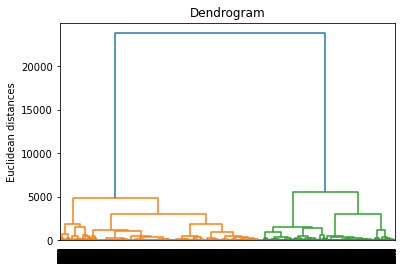

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean',
                             linkage = 'ward')
y_hc = hc.fit_predict(X)

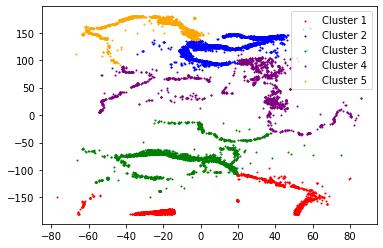

In [15]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 1, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 1, c = 'purple', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 1, c = 'orange', label = 'Cluster 5')

plt.legend()
plt.show()


In [16]:
len(y_hc)

18725